## API Data Report 
### Sienna Jepsen
### November 1st, 2024
####  The Slow Rush album by Tame Impala is more popular than their earlier album, Currents, because of its higher score on the danceability scale. I am curious to see if I am right in saying that The Slow Rush is more popular because I personally enjoy more of the songs on that album than songs from Currents and I believe that other listeners feel the same. It will also be interesting to compare the numbers between both albums and have a visual representation of which songs on the albums are more well-liked. 

#### The Spotify endpoints that I will try to use to test this hypothesis are going to be GET /audio-features/{danceability} and GET /albums/{popularity}. I will have to learn about the popularity of each album on their own in order to gather an understanding of which album is listened to more often compared to the other. With that information, I will use the danceability endpoint in connection with each album to show if one or the other has a higher number on the danceability scale. This data may be unreliable because while I am hoping to gather what I need from these two endpoints, they may not be correctly suited for my hypothesis once I start working with them. 

In [45]:
import pandas as pd
import json 
import base64 
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
def get_session_token(SessionID, SessionKey):
    url= 'https://accounts.spotify.com/api/token' 
    data = {'grant_type': 'client_credentials'} 
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii")) 
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response= requests.post(url, 
                            data= data,
                            headers= header)
    print(response.status_code)     
    return response.json()['access_token'] 

In [47]:
keys = pd.read_csv("keys.txt")

In [48]:
#keys

In [49]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [50]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
ab_ep = 'https://api.spotify.com/v1/albums/{}'
tracks_ep= 'https://api.spotify.com/v1/tracks'

##### I want to get api endpoints from 3 different locations in order to find info about the tracks, track features like popularity, and the albums as a whole

In [51]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json() 

In [52]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [53]:
currents_album_id = '79dL7FLiJFOO0EoehUHQBv' 
slowrush_album_id = '31qVWUdRrlb8thMvts0yYL'

In [54]:
ab_ep.format(currents_album_id)

'https://api.spotify.com/v1/albums/79dL7FLiJFOO0EoehUHQBv'

In [55]:
currents_album_response = api_call(ab_ep.format(currents_album_id), session_header)
slowrush_album_response = api_call(ab_ep.format(slowrush_album_id), session_header)

200
200


In [56]:
currents_album_response['popularity']

85

In [57]:
slowrush_album_response['popularity']

79

In [58]:
currents_album_response['tracks'] #need to do this until line 73 for slowrush_album_response

{'href': 'https://api.spotify.com/v1/albums/79dL7FLiJFOO0EoehUHQBv/tracks?offset=0&limit=50',
 'limit': 50,
 'next': None,
 'offset': 0,
 'previous': None,
 'total': 13,
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5INjqkS1o8h1imAzPqGZBb'},
     'href': 'https://api.spotify.com/v1/artists/5INjqkS1o8h1imAzPqGZBb',
     'id': '5INjqkS1o8h1imAzPqGZBb',
     'name': 'Tame Impala',
     'type': 'artist',
     'uri': 'spotify:artist:5INjqkS1o8h1imAzPqGZBb'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',

In [59]:
type(currents_album_response['tracks'])

dict

In [60]:
(currents_album_response['tracks'].keys())

dict_keys(['href', 'limit', 'next', 'offset', 'previous', 'total', 'items'])

In [61]:
currents_album_response['tracks']['items']

[{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5INjqkS1o8h1imAzPqGZBb'},
    'href': 'https://api.spotify.com/v1/artists/5INjqkS1o8h1imAzPqGZBb',
    'id': '5INjqkS1o8h1imAzPqGZBb',
    'name': 'Tame Impala',
    'type': 'artist',
    'uri': 'spotify:artist:5INjqkS1o8h1imAzPqGZBb'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW',
   'EG',
   'MA',
   'DZ'

##### Took 'items' out from the 'tracks' dictionary 

In [62]:
type(currents_album_response['tracks']['items'])

list

In [89]:
currents_album_df = pd.DataFrame(currents_album_response['tracks']['items'])
slowrush_album_df = pd.DataFrame(slowrush_album_response['tracks']['items'])
currents_album_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,467586,False,{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,2X485T9Z5Ly0xyaghN73ed,Let It Happen,None,1,track,spotify:track:2X485T9Z5Ly0xyaghN73ed,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,107533,False,{'spotify': 'https://open.spotify.com/track/1c...,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,1cCbsojaA6GIT7Y3zuMJ1q,Nangs,None,2,track,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,255413,False,{'spotify': 'https://open.spotify.com/track/1U...,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,1UYj8qTWjneZJDVjUMwMub,The Moment,None,3,track,spotify:track:1UYj8qTWjneZJDVjUMwMub,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,270680,True,{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,0xtIp0lgccN85GfGOekS5L,Yes I'm Changing,None,4,track,spotify:track:0xtIp0lgccN85GfGOekS5L,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,318591,False,{'spotify': 'https://open.spotify.com/track/5M...,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,5M4yti0QxgqJieUYaEXcpw,Eventually,None,5,track,spotify:track:5M4yti0QxgqJieUYaEXcpw,False


In [90]:
currents_tracks= api_call(tracks_ep + '?market=US&ids={}'.format(slowrush_album_id), session_header)

200


##### This error is one that I just haven't been able to move past. It's really frustrating for me with something like this because you helped me with this in class and I am already not totally understanding how to get to where we are, so when an error like this pops up I can't fix it on my own. 

In [91]:
print(currents_album_response.keys())

dict_keys(['album_type', 'total_tracks', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri', 'artists', 'tracks', 'copyrights', 'external_ids', 'genres', 'label', 'popularity'])


In [92]:
slowrush_album_response['tracks']

{'href': 'https://api.spotify.com/v1/albums/31qVWUdRrlb8thMvts0yYL/tracks?offset=0&limit=50',
 'limit': 50,
 'next': None,
 'offset': 0,
 'previous': None,
 'total': 12,
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5INjqkS1o8h1imAzPqGZBb'},
     'href': 'https://api.spotify.com/v1/artists/5INjqkS1o8h1imAzPqGZBb',
     'id': '5INjqkS1o8h1imAzPqGZBb',
     'name': 'Tame Impala',
     'type': 'artist',
     'uri': 'spotify:artist:5INjqkS1o8h1imAzPqGZBb'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',

In [93]:
type(slowrush_album_response['tracks'])

dict

In [94]:
(slowrush_album_response['tracks'].keys())

dict_keys(['href', 'limit', 'next', 'offset', 'previous', 'total', 'items'])

In [95]:
slowrush_album_response['tracks']['items']

[{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5INjqkS1o8h1imAzPqGZBb'},
    'href': 'https://api.spotify.com/v1/artists/5INjqkS1o8h1imAzPqGZBb',
    'id': '5INjqkS1o8h1imAzPqGZBb',
    'name': 'Tame Impala',
    'type': 'artist',
    'uri': 'spotify:artist:5INjqkS1o8h1imAzPqGZBb'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW',
   'EG',
   'MA',
   'DZ'

In [96]:
type(slowrush_album_response['tracks']['items'])

list

In [97]:
currents_album_df = pd.DataFrame(currents_album_response['tracks']['items'])
slowrush_album_df = pd.DataFrame(slowrush_album_response['tracks']['items'])
slowrush_album_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,324013,False,{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5ozqshq2dtU7...,5ozqshq2dtU7SYCpCBu0NE,One More Year,None,1,track,spotify:track:5ozqshq2dtU7SYCpCBu0NE,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,194706,False,{'spotify': 'https://open.spotify.com/track/6W...,https://api.spotify.com/v1/tracks/6WCXBUFa0z3l...,6WCXBUFa0z3l9DoOY3k5Xe,Instant Destiny,None,2,track,spotify:track:6WCXBUFa0z3l9DoOY3k5Xe,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,237800,False,{'spotify': 'https://open.spotify.com/track/5h...,https://api.spotify.com/v1/tracks/5hM5arv9KDbC...,5hM5arv9KDbCHS0k9uqwjr,Borderline,None,3,track,spotify:track:5hM5arv9KDbCHS0k9uqwjr,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,366066,False,{'spotify': 'https://open.spotify.com/track/1K...,https://api.spotify.com/v1/tracks/1KcOU0q9AMXV...,1KcOU0q9AMXV9xi4tSzzCc,Posthumous Forgiveness,None,4,track,spotify:track:1KcOU0q9AMXV9xi4tSzzCc,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,372866,False,{'spotify': 'https://open.spotify.com/track/3L...,https://api.spotify.com/v1/tracks/3LbZIhU0smEU...,3LbZIhU0smEU5SUnxod4j4,Breathe Deeper,None,5,track,spotify:track:3LbZIhU0smEU5SUnxod4j4,False


In [98]:
currents_tracks= api_call(tracks_ep + '?market=US&ids={}'.format(slowrush_album_id), session_header)

200


In [99]:
print(currents_album_response.keys())

dict_keys(['album_type', 'total_tracks', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri', 'artists', 'tracks', 'copyrights', 'external_ids', 'genres', 'label', 'popularity'])


In [100]:
print(slowrush_album_id)

31qVWUdRrlb8thMvts0yYL


In [101]:
currents_album_ids = ','.join(currents_album_df['id'].to_list())
slowrush_album_ids = ','.join(currents_album_df['id'].to_list())

In [102]:
t_features_ep + '?ids={}'.format(currents_album_ids)

'https://api.spotify.com/v1/audio-features?ids=2X485T9Z5Ly0xyaghN73ed,1cCbsojaA6GIT7Y3zuMJ1q,1UYj8qTWjneZJDVjUMwMub,0xtIp0lgccN85GfGOekS5L,5M4yti0QxgqJieUYaEXcpw,79chzfFIIq7cHkqcYYORk0,6K4t31amVTZDgR3sKmwUJJ,4a9fW33mYR8LhXBOLUhbfF,2gNfxysfBRfl9Lvi9T3v6R,2O99aywAVBhaPrsiJ6zbSS,3I7OmVsk4Hm5LBbs2GmhlD,5h9hkYIBWTZYFRmF6Iz1gt,52ojopYMUzeNcudsoz7O9D'

In [103]:
currents_track_features = api_call(t_features_ep + '?market=US&ids={}'.format(currents_album_ids),
                             session_header)
slowrush_track_features = api_call(t_features_ep + '?market=US&ids={}'.format(slowrush_album_ids),
                             session_header)

200
200


In [104]:
currents_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(currents_album_ids),
                             session_header)
slowrush_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(slowrush_album_ids),
                             session_header)

200
200


In [105]:
currents_track_info['tracks'][0]['popularity']

77

In [106]:
currents_features_df= pd.DataFrame(currents_track_features['audio_features'])
slowrush_features_df= pd.DataFrame(slowrush_track_features['audio_features'])

In [107]:
currents_tracks_df = pd.DataFrame(currents_track_info ['tracks'])
slowrush_tracks_df = pd.DataFrame(slowrush_track_info ['tracks'])
currents_tracks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,467586,False,{'isrc': 'AUUM71500292'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,2X485T9Z5Ly0xyaghN73ed,False,True,Let It Happen,77,None,1,track,spotify:track:2X485T9Z5Ly0xyaghN73ed
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,107533,False,{'isrc': 'AUUM71500293'},{'spotify': 'https://open.spotify.com/track/1c...,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,1cCbsojaA6GIT7Y3zuMJ1q,False,True,Nangs,71,None,2,track,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,255413,False,{'isrc': 'AUUM71500304'},{'spotify': 'https://open.spotify.com/track/1U...,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,1UYj8qTWjneZJDVjUMwMub,False,True,The Moment,63,None,3,track,spotify:track:1UYj8qTWjneZJDVjUMwMub
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,270680,True,{'isrc': 'AUUM71500295'},{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,0xtIp0lgccN85GfGOekS5L,False,True,Yes I'm Changing,67,None,4,track,spotify:track:0xtIp0lgccN85GfGOekS5L
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,318591,False,{'isrc': 'AUUM71500296'},{'spotify': 'https://open.spotify.com/track/5M...,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,5M4yti0QxgqJieUYaEXcpw,False,True,Eventually,73,None,5,track,spotify:track:5M4yti0QxgqJieUYaEXcpw


In [108]:
currents_merged = pd.merge(currents_features_df, currents_tracks_df,
         how = 'inner', on = 'id')
currents_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.602,0.881,1,-5.875,0,0.0443,0.004620,0.026600,0.1110,0.577,...,{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,False,True,Let It Happen,77,None,1,track,spotify:track:2X485T9Z5Ly0xyaghN73ed
1,0.536,0.526,0,-9.754,1,0.1810,0.159000,0.847000,0.1280,0.434,...,{'spotify': 'https://open.spotify.com/track/1c...,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,False,True,Nangs,71,None,2,track,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q
2,0.547,0.827,7,-6.036,1,0.0468,0.000296,0.101000,0.0858,0.451,...,{'spotify': 'https://open.spotify.com/track/1U...,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,False,True,The Moment,63,None,3,track,spotify:track:1UYj8qTWjneZJDVjUMwMub
3,0.373,0.609,0,-7.000,1,0.0316,0.108000,0.000427,0.0755,0.354,...,{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,False,True,Yes I'm Changing,67,None,4,track,spotify:track:0xtIp0lgccN85GfGOekS5L
4,0.424,0.615,9,-6.217,0,0.0325,0.015800,0.000389,0.0844,0.155,...,{'spotify': 'https://open.spotify.com/track/5M...,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,False,True,Eventually,73,None,5,track,spotify:track:5M4yti0QxgqJieUYaEXcpw


In [109]:
currents_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'],
      dtype='object')

In [110]:
slowrush_merged = pd.merge(slowrush_features_df, slowrush_tracks_df, how = 'inner', on = 'id')
currents_merged['artist'] = "Currents"
slowrush_merged['artist'] = "Slow Rush"
currents_merged.columns #added artist to the list

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'artist'],
      dtype='object')

In [111]:
artist_compare = pd.concat([currents_merged, slowrush_merged], axis = 0) #add to the rows second dataframe axis 0 is rows x is 1 is columns
artist_compare

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.602,0.881,1,-5.875,0,0.0443,0.004620,0.026600,0.1110,0.577,...,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,False,True,Let It Happen,77,None,1,track,spotify:track:2X485T9Z5Ly0xyaghN73ed,Currents
1,0.536,0.526,0,-9.754,1,0.1810,0.159000,0.847000,0.1280,0.434,...,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,False,True,Nangs,71,None,2,track,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q,Currents
2,0.547,0.827,7,-6.036,1,0.0468,0.000296,0.101000,0.0858,0.451,...,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,False,True,The Moment,63,None,3,track,spotify:track:1UYj8qTWjneZJDVjUMwMub,Currents
3,0.373,0.609,0,-7.000,1,0.0316,0.108000,0.000427,0.0755,0.354,...,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,False,True,Yes I'm Changing,67,None,4,track,spotify:track:0xtIp0lgccN85GfGOekS5L,Currents
4,0.424,0.615,9,-6.217,0,0.0325,0.015800,0.000389,0.0844,0.155,...,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,False,True,Eventually,73,None,5,track,spotify:track:5M4yti0QxgqJieUYaEXcpw,Currents
5,0.547,0.208,11,-17.949,0,0.0369,0.974000,0.973000,0.1040,0.347,...,https://api.spotify.com/v1/tracks/79chzfFIIq7c...,False,True,Gossip,55,None,6,track,spotify:track:79chzfFIIq7cHkqcYYORk0,Currents
6,0.640,0.740,4,-4.083,1,0.0284,0.011500,0.006780,0.1670,0.785,...,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,False,True,The Less I Know The Better,83,None,7,track,spotify:track:6K4t31amVTZDgR3sKmwUJJ,Currents
7,0.371,0.778,7,-7.196,0,0.0559,0.211000,0.001410,0.1810,0.288,...,https://api.spotify.com/v1/tracks/4a9fW33mYR8L...,False,True,Past Life,56,None,8,track,spotify:track:4a9fW33mYR8LhXBOLUhbfF,Currents
8,0.661,0.869,5,-5.477,1,0.0334,0.078000,0.924000,0.3980,0.800,...,https://api.spotify.com/v1/tracks/2gNfxysfBRfl...,False,True,Disciples,67,None,9,track,spotify:track:2gNfxysfBRfl9Lvi9T3v6R,Currents
9,0.547,0.695,9,-4.969,1,0.0337,0.108000,0.003010,0.1400,0.641,...,https://api.spotify.com/v1/tracks/2O99aywAVBha...,False,True,'Cause I'm A Man,59,None,10,track,spotify:track:2O99aywAVBhaPrsiJ6zbSS,Currents


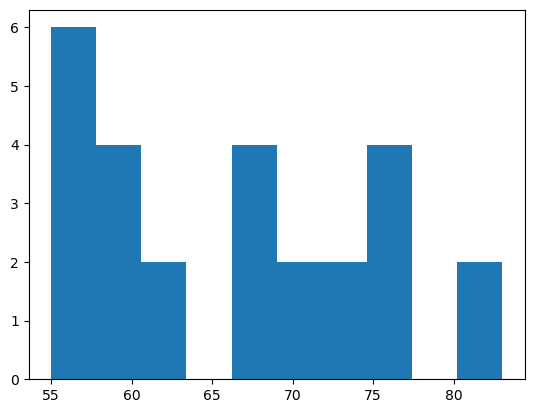

In [112]:
fig1, ax1 = plt.subplots() 
ax1.hist(artist_compare['popularity']) #my data is stored in artist_compare and so that is where we are pulling it from
plt.show()

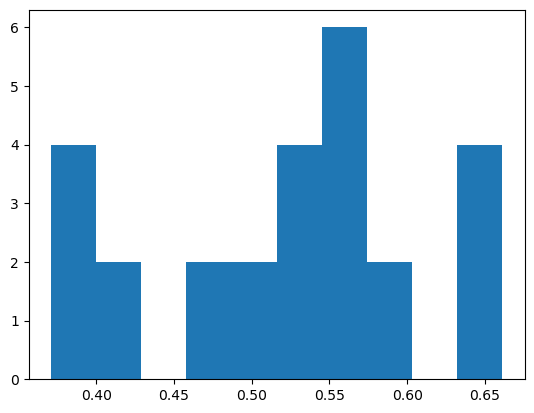

In [113]:
fig2, ax2 = plt.subplots() 
ax2.hist(artist_compare['danceability']) 
plt.show()

#### use sns.joinplot to use danceability and popularity in one graph to show the correlation betweeen the two

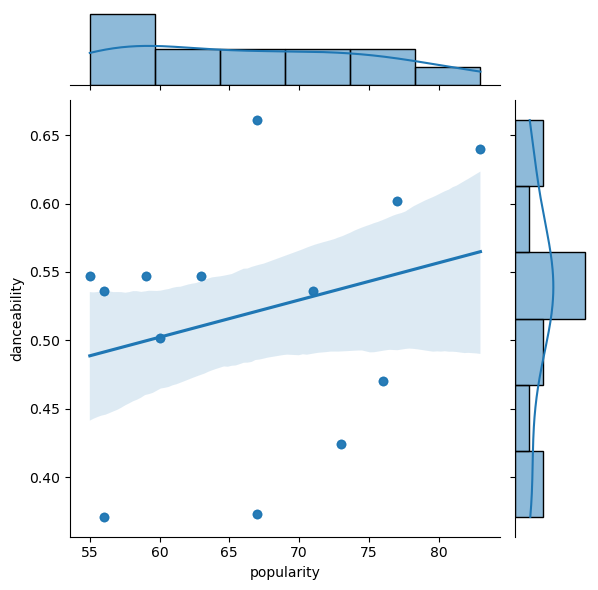

In [114]:
sns.jointplot(kind = 'reg', data = artist_compare, 
            x= 'popularity', y = 'danceability')
plt.show()

#### I tried to go line by line and see where there could be something making slowrush and currents output the same variables but I wasn't able to see anything that stuck out for me to change.